Dataset imported from
http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

Dataset Description
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. 

In [56]:
#the text file downloaded isnt in the csv format so converting it to that

In [57]:
#rename it to cancer.csv

In [58]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing our cancer dataset
dataset = pd.read_csv('cancer.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [59]:
dataset.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


thus the dataset doesnt have any header which we need to thus add manually

In [60]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (568, 32)


In [61]:
headerList = ['id', 'diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension',
              'SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension',
              'worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']
# converting data frame to csv
dataset.to_csv("cancer_modified.csv", header=headerList, index=False)

In [62]:
dataset = pd.read_csv('cancer_modified.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [63]:
dataset.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [64]:
dataset

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [65]:
X

array([['M', 20.57, 17.77, ..., 0.2416, 0.186, 0.275],
       ['M', 19.69, 21.25, ..., 0.4504, 0.243, 0.3613],
       ['M', 11.42, 20.38, ..., 0.6869, 0.2575, 0.6638],
       ...,
       ['M', 16.6, 28.08, ..., 0.3403, 0.1418, 0.2218],
       ['M', 20.6, 29.33, ..., 0.9387, 0.265, 0.4087],
       ['B', 7.76, 24.54, ..., 0.0, 0.0, 0.2871]], dtype=object)

In [66]:
row_len=len(dataset)

In [67]:
for row in range(0,1):
    print(row)
    print(dataset.iloc[row])

0
id                           842517
diagnosis                         M
mean_radius                   20.57
mean_texture                  17.77
mean_perimeter                132.9
mean_area                    1326.0
mean_smoothness             0.08474
mean_compactness            0.07864
mean_concavity               0.0869
mean_concave points         0.07017
mean_symmetry                0.1812
mean_fractal dimension      0.05667
SE_radius                    0.5435
SE_texture                   0.7339
SE_perimeter                  3.398
SE_area                       74.08
SE_smoothness              0.005225
SE_compactness              0.01308
SE_concavity                 0.0186
SE_concave points            0.0134
SE_symmetry                 0.01389
SE_fractal dimension       0.003532
worst_radius                  24.99
worst_texture                 23.41
worst_perimeter               158.8
worst_area                   1956.0
worst_smoothness             0.1238
worst_compactness         

finding the diagnosis cell related info

In [68]:
dataset['diagnosis'].describe()

count     568
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [69]:
#thus benign types entries are 357 and malign are hence 568-357=211

Visualizing the data

In [70]:
lis1=headerList[2:]

In [71]:
lis1

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave points',
 'mean_symmetry',
 'mean_fractal dimension',
 'SE_radius',
 'SE_texture',
 'SE_perimeter',
 'SE_area',
 'SE_smoothness',
 'SE_compactness',
 'SE_concavity',
 'SE_concave points',
 'SE_symmetry',
 'SE_fractal dimension',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave points',
 'worst_symmetry',
 'worst_fractal dimension']

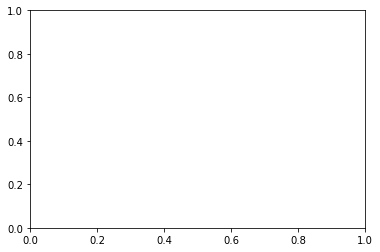

In [72]:
for name in lis1:
    plotdata=dataset[name]
    a=plotdata.plot(kind="hist");
    a.figure.savefig('graph_images/'+name)
    a.clear()

In [73]:
images=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension',
              'worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']

    Displaying the graphs thus generated

In [74]:
import matplotlib.image as mpimg
import os

**MEAN VALUE GRAPHS**

<ipython-input-75-da7c95ff2dae>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])


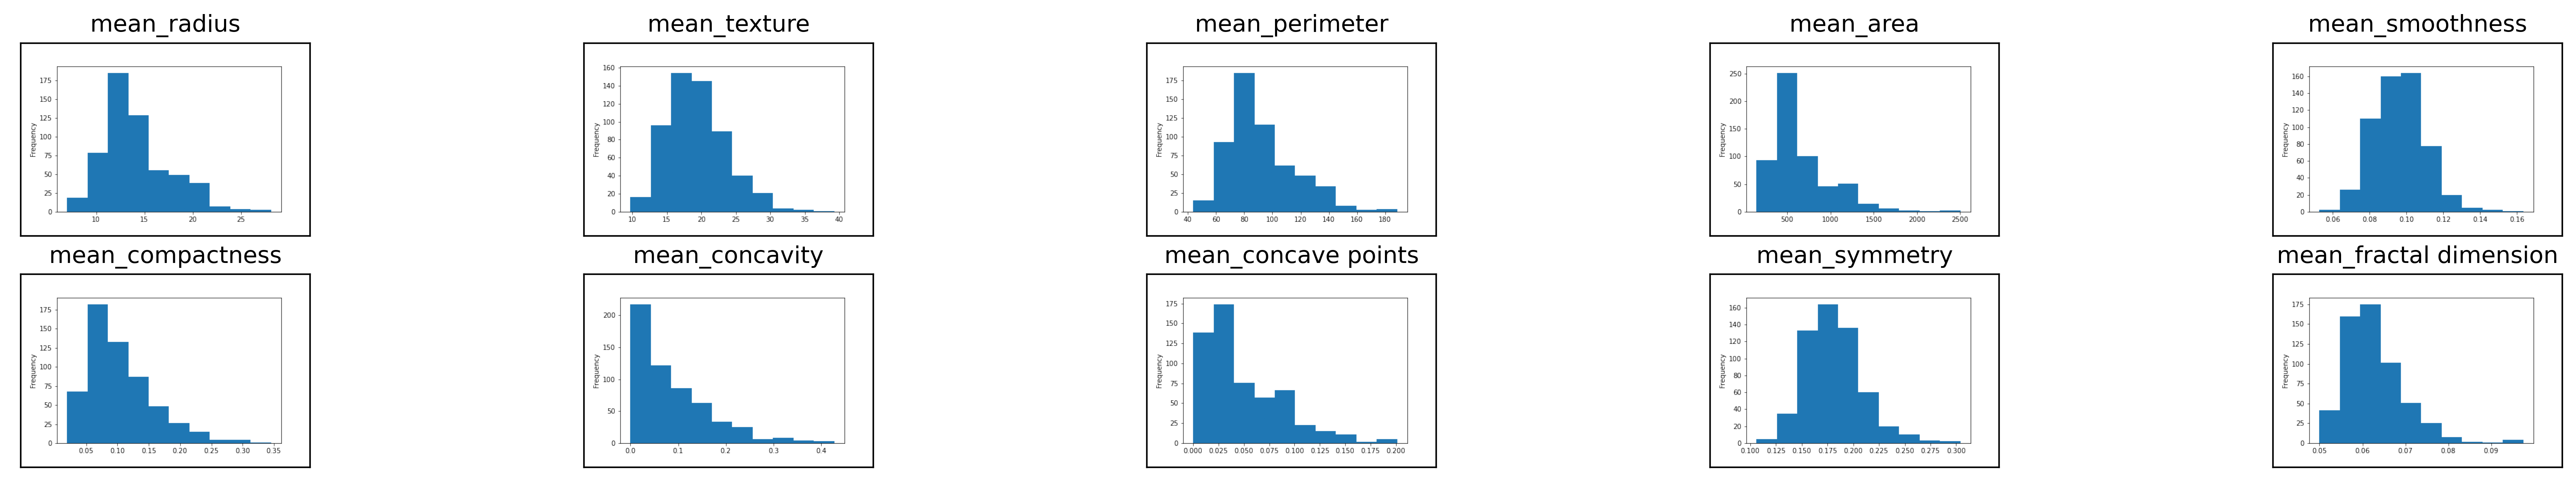

In [75]:
i=0
fig = plt.figure(figsize=(25, 4),dpi=400)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    mpimg_img = mpimg.imread(os.path.join('graph_images', images[i]+'.png')) 
    ax.imshow(mpimg_img)
    ax.set_title(images[i])
    i+=1

**SE VALUE GRAPHS**

<ipython-input-76-c81dc2edcb12>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])


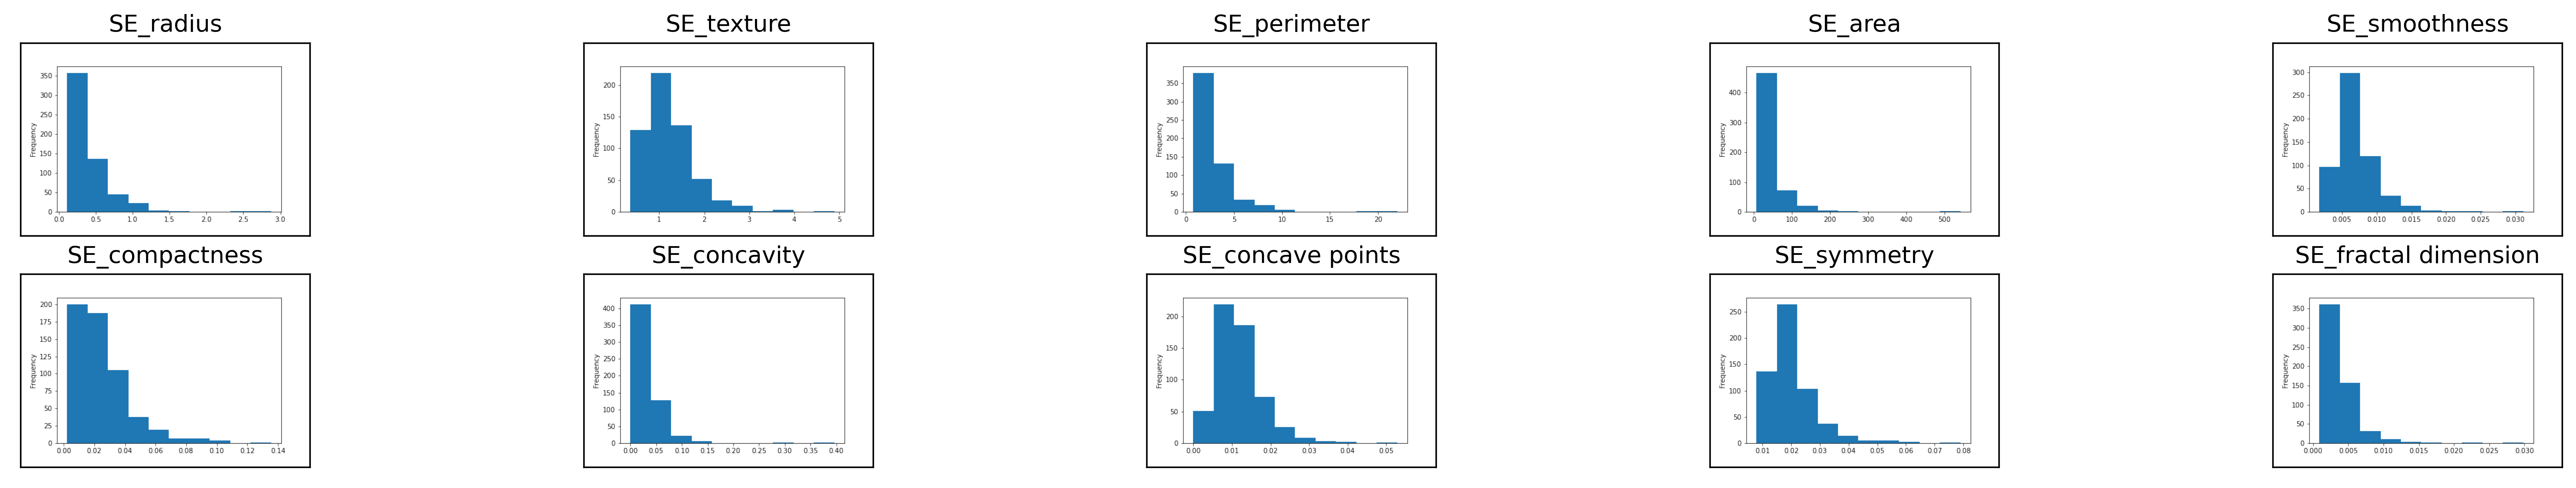

In [76]:
i=10
fig = plt.figure(figsize=(25, 4),dpi=400)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    mpimg_img = mpimg.imread(os.path.join('graph_images', images[i]+'.png')) 
    ax.imshow(mpimg_img)
    ax.set_title(images[i])
    i+=1

**WORST VALUE GRAPHS**

<ipython-input-77-4bfe350f63b1>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])


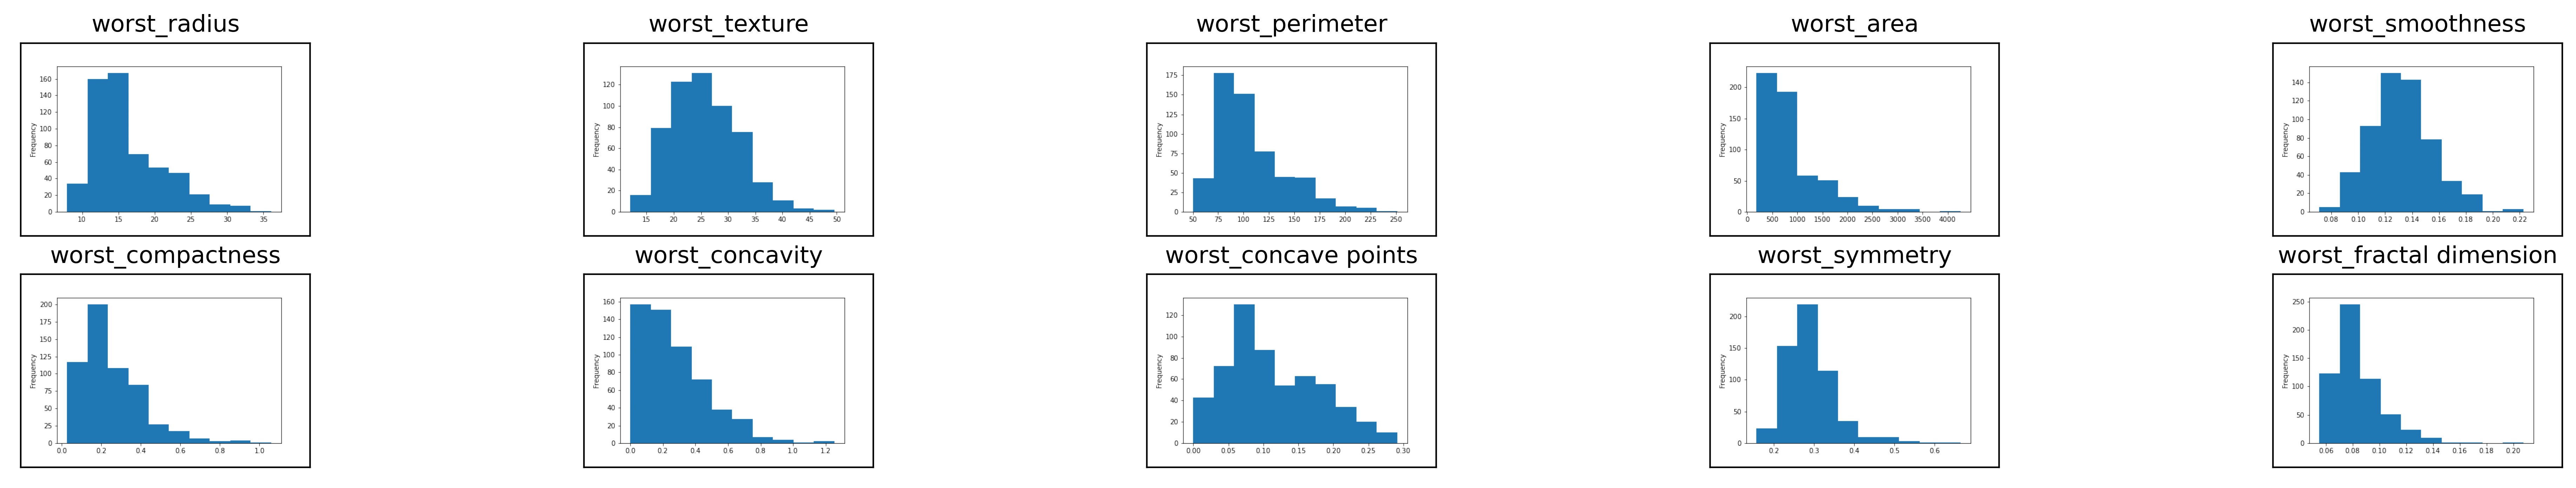

In [77]:
i=20
fig = plt.figure(figsize=(25, 4),dpi=400)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    mpimg_img = mpimg.imread(os.path.join('graph_images', images[i]+'.png')) 
    ax.imshow(mpimg_img)
    ax.set_title(images[i])
    i+=1

Inference:the dataset contains features highly varying in magnitudes, units and range and thus needs to be scaled accordingly.Also the data is skewed at times to the left or right and hence needs to be normalised too

Missing or Null Data points
We can find any missing or null data points of the data set (if there is any) using the following pandas function.


In [78]:
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave points        0
mean_symmetry              0
mean_fractal dimension     0
SE_radius                  0
SE_texture                 0
SE_perimeter               0
SE_area                    0
SE_smoothness              0
SE_compactness             0
SE_concavity               0
SE_concave points          0
SE_symmetry                0
SE_fractal dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave points       0
worst_symmetry             0
worst_fractal dimension    0
dtype: int64

Since there arent any null values present in the dataset we dont need to unecessarily delete any rows 

Categorical Data to Numerical Data thus easing the ML process
Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
dataset['diagnosis'] = labelencoder_Y.fit_transform(dataset['diagnosis'])

In [80]:
dataset.tail()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
567,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Thus we have converted the categorical diagnosis to numerical with malign being 1

Splitting the dataset

In [81]:
X=dataset.drop(['diagnosis'],axis=1)

In [82]:
X.head()

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [83]:
Y=dataset['diagnosis']

In [84]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

 Feature Scaling

We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that transforming the data so that it fits within a specific scale, like 0–100 or 0–1.
We will use StandardScaler method from SciKit-Learn library.

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***Example***

Example of a single entry in the data thus produced

False Negative (FN): It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative.

Thus FN is of much importance to us because if a breast cancer patient is shown as not having breast cancer it would be a potential threat to her life as compared to if a non breast cancer patient is shown as having breast cancer in which case
she could be sent for further testing

In [90]:
from PIL import Image

In [92]:
Image.open(filename='conf.png') 

TypeError: open() got an unexpected keyword argument 'filename'

**Precision**: It tells you what fraction of predictions as a positive class were actually positive. To calculate precision, use the following formula: TP/(TP+FP).


**Recall**: It tells you what fraction of all positive samples were correctly predicted as positive by the classifier. It is also known as True Positive Rate (TPR), Sensitivity, Probability of Detection. To calculate Recall, use the following formula: TP/(TP+FN).


**F1-score**: It combines precision and recall into a single measure. Mathematically it’s the harmonic mean of precision and recall. It can be calculated as follows:


***Model Selection***

****Using Logistic Regression Algorithm to the Training Set****

In [93]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

Predicting the results on the test dataset

In [94]:
Y_pred = classifier.predict(X_test)

In [95]:
Y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

Testing via the confusion matrix

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [97]:
cm

array([[91,  1],
       [ 3, 47]], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred)))



Accuracy: 0.97
Precision: 0.98
Recall: 0.94
F1-score: 0.96



****Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm****

In [99]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Predicting the results on the test dataset

In [100]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [102]:
cm

array([[92,  0],
       [ 6, 44]], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred)))



Accuracy: 0.96
Precision: 1.00
Recall: 0.88
F1-score: 0.94



****Using SVC method of svm class to use Support Vector Machine Algorithm****

In [104]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

Predicting the results on the test dataset

In [105]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [107]:
cm

array([[90,  2],
       [ 5, 45]], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred)))



Accuracy: 0.95
Precision: 0.96
Recall: 0.90
F1-score: 0.93



****Using SVC method of svm class to use Kernel SVM Algorithm****

In [109]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

Predicting the results on the test dataset

In [110]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [112]:
cm

array([[92,  0],
       [ 6, 44]], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred)))



Accuracy: 0.96
Precision: 1.00
Recall: 0.88
F1-score: 0.94



****Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm****

In [114]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

Predicting the results on the test dataset

In [115]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [117]:
cm

array([[88,  4],
       [ 6, 44]], dtype=int64)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred)))



Accuracy: 0.93
Precision: 0.92
Recall: 0.88
F1-score: 0.90



****Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm****

In [119]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the results on the test dataset

In [120]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [122]:
cm

array([[83,  9],
       [ 6, 44]], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred)))



Accuracy: 0.89
Precision: 0.83
Recall: 0.88
F1-score: 0.85



****Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm****

In [124]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Predicting the results on the test dataset

In [125]:
Y_pred = classifier.predict(X_test)

Testing via the confusion matrix

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [127]:
cm

array([[90,  2],
       [ 5, 45]], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, Y_pred)))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred)))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred)))
print('F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_pred)))



Accuracy: 0.95
Precision: 0.96
Recall: 0.90
F1-score: 0.93



***Final Results***

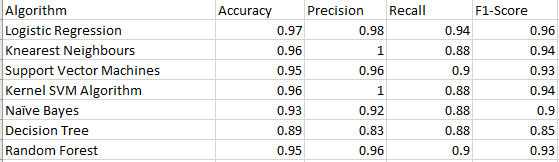

In [129]:
from IPython.display import Image
Image(filename='pic.png') 

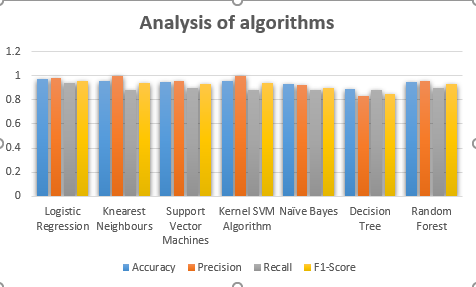

In [130]:
from IPython.display import Image
Image(filename='graph.png') 

**Conclusion**

Based on the above results Logistic Regression outperforms all other machine learnining algorithms

**SAVING THE LR MODEL TO BE USED ON THE WEBSITE**

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [66]:
import pickle

**SAVING THE MODEL**

In [67]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

**TESTING THE SAVED MODEL**

In [69]:
 # load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred = loaded_model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [71]:
cm

array([[91,  1],
       [ 3, 47]], dtype=int64)